# Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

Matplotlib is building the font cache; this may take a moment.


In [4]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [5]:
picture_size =64
folder_path = "/Users/yusefturin/EmotionDetection/datasets/DatasetOFacesSplit/"

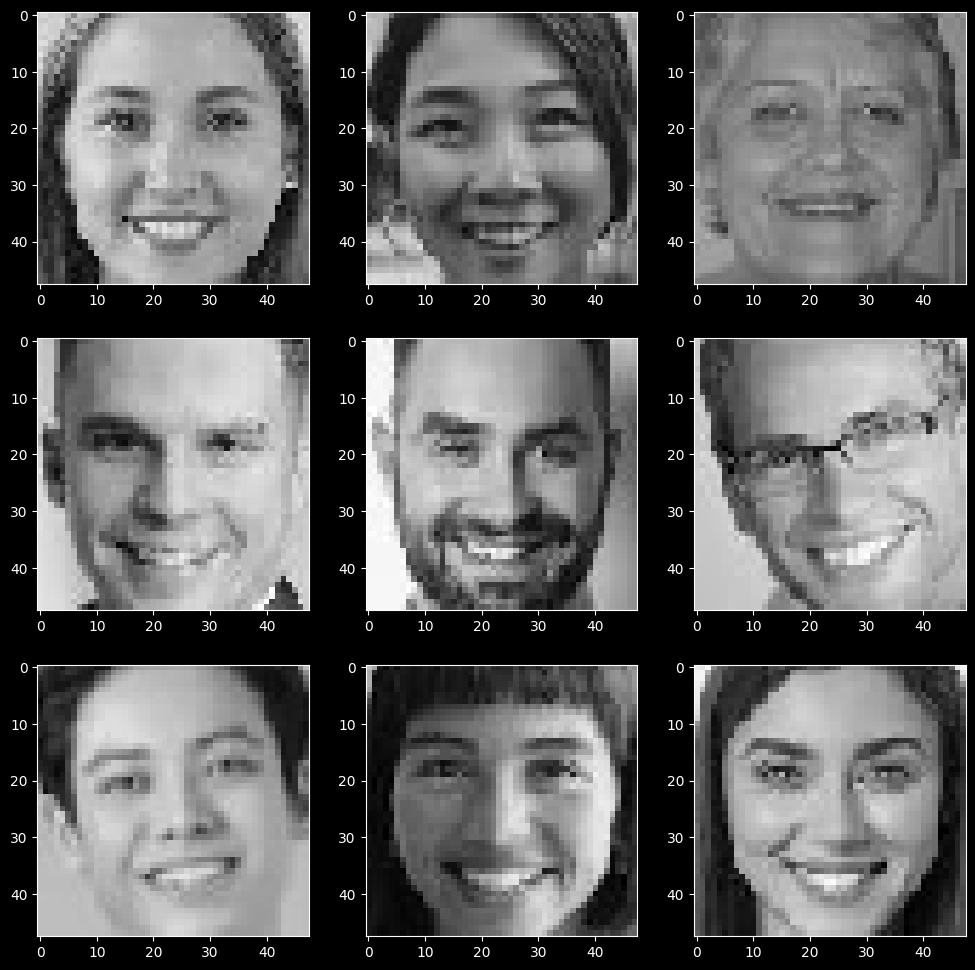

In [6]:
expression= 'happy'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
  plt.subplot(3,3,i)
  image = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path+"train/"+expression)[i],
                  target_size=(picture_size, picture_size))
  plt.imshow(image)
plt.show()

# Making Training and Validation Data

In [7]:
batch_size  = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

In [8]:
train_set = datagen_train.flow_from_directory(folder_path+"Train",
                                                    target_size = (picture_size, picture_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle=True)

validation_set = datagen_val.flow_from_directory(folder_path+"Val",
                                                    target_size = (picture_size, picture_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle=False)

Found 703 images belonging to 10 classes.
Found 175 images belonging to 10 classes.


# Model Building

In [ ]:
class_NUM = 10
# Define input layer
inputs = Input(shape=(64, 64, 1))

# 1st CNN layer
x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# 2nd CNN layer
x = Conv2D(128, (5, 5), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# 3rd CNN layer
x = Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# 3rd CNN layer
x = Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Flatten layer
x = Flatten()(x)

# Fully connected 1st layer
x = Dense(256, kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

# Fully connected 2nd layer
x = Dense(512, kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

# Output layer
outputs = Dense(class_NUM, activation='softmax')(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
optimization = Adam(learning_rate=0.0001)
model.compile(optimizer=optimization, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0     

# Fitting the Model with Training and Validation Data 

In [8]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# callbacks
checkpoint = ModelCheckpoint("/Users/yusefturin/EmotionDetection/assets/models/Model48",monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                                        restore_best_weights=True,
                                        patience=10,
                                        verbose=1,
                                        min_delta=0)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=10,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 96

In [9]:
history = model.fit(train_set,
                              steps_per_epoch=len(train_set) ,
                              epochs=epochs,
                              validation_data=validation_set,
                              validation_steps=len(validation_set),
                              callbacks=callbacks_list
                              )

Epoch 1/96
12/12 [==============================] - ETA: 0s - loss: 4.4719 - accuracy: 0.1020
Epoch 1: val_accuracy improved from -inf to 0.15429, saving model to C:/Users/youse/Documents/unviversity/5th_Year_second/ApplicationOfAI/final project\model11.h5
12/12 [==============================] - 49s 4s/step - loss: 4.4719 - accuracy: 0.1020 - val_loss: 4.6716 - val_accuracy: 0.1543 - lr: 1.0000e-04
Epoch 2/96
12/12 [==============================] - ETA: 0s - loss: 4.4152 - accuracy: 0.1299
Epoch 2: val_accuracy did not improve from 0.15429
12/12 [==============================] - 69s 6s/step - loss: 4.4152 - accuracy: 0.1299 - val_loss: 4.1960 - val_accuracy: 0.1543 - lr: 1.0000e-04
Epoch 3/96
12/12 [==============================] - ETA: 0s - loss: 4.2585 - accuracy: 0.1369
Epoch 3: val_accuracy improved from 0.15429 to 0.16000, saving model to C:/Users/youse/Documents/unviversity/5th_Year_second/ApplicationOfAI/final project\model11.h5
12/12 [==============================] - 82s 7

KeyboardInterrupt: 

# Plotting Accuracy & Loss

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimized: Adam', fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'],label='Traning Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Traning Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()